In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2

ORIGINAL IMAGE


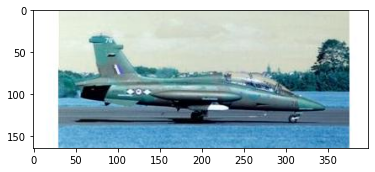

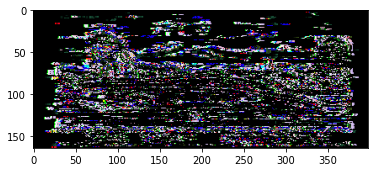

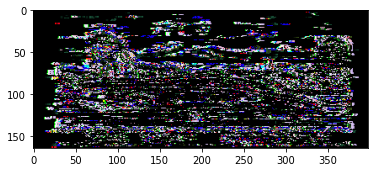

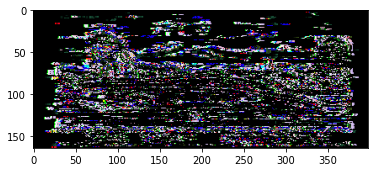

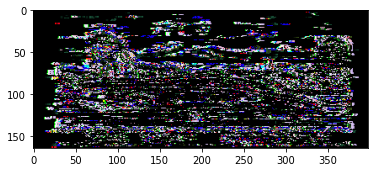

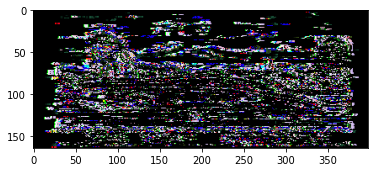

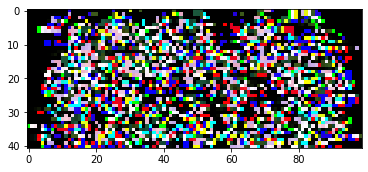

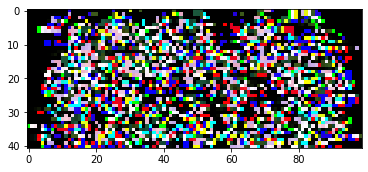

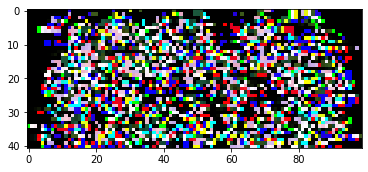

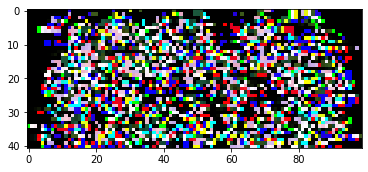

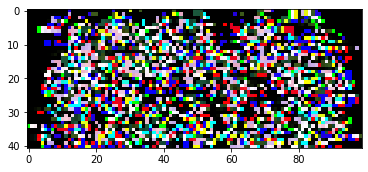

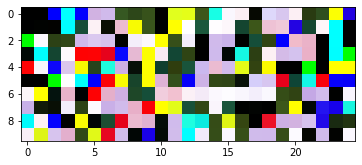

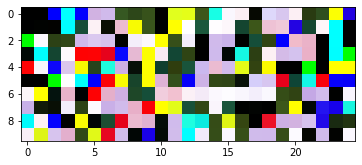

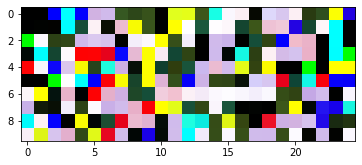

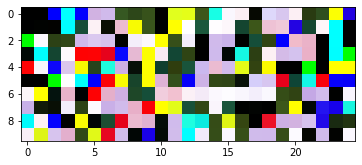

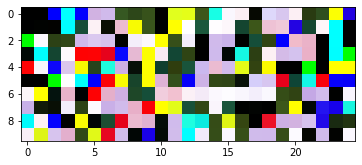

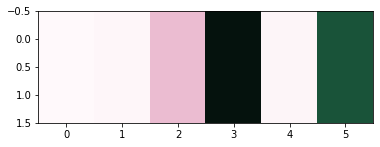

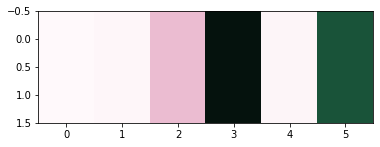

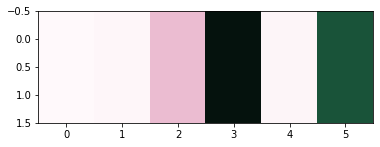

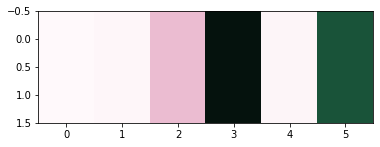

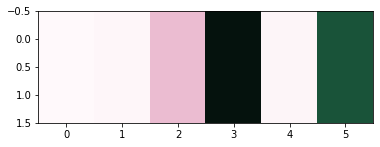

In [2]:
img = cv2.imread('./101_ObjectCategories/airplanes/image_0001.jpg')

print("ORIGINAL IMAGE")
plt.imshow(img)
plt.show()

#print("Filtered with Sigma = 1")
#y = gaussian_filter(img, sigma = 1)
#plt.imshow(y)
#plt.show()

#y = gaussian_filter(img, sigma = 2)
#plt.imshow(y)
#plt.show()

#def diffOfGaussian(img, k, sigma):
#    return gaussian_filter(img, k * sigma) - gaussian_filter(img, sigma)
    
def gen_octave(img, s, sigma): 
    octave = [] 
    k = int(2**(1/s))
    for i in range(s+3):  
        octave.append(gaussian_filter(img, 1, sigma))  
        sigma *= k
    return octave

def gen_gauss_pymid(img, s, sigma, num_octaves): 
    pyr = []   
    for i in range(num_octaves): 
        octave = gen_octave(img, s, sigma) 
        pyr.append(octave) 
        img = (octave[-3][::2, ::2]).astype('uint8')
        dim = (int(img.shape[1] / 2), int(img.shape[0] / 2))
        try:
            img = cv2.resize(img, dim, cv2.INTER_AREA)
        except:
            break
    return pyr

x = gen_gauss_pymid(img, s = 2, sigma = 1, num_octaves = 5)

for eachOctave in x:
    for pic in eachOctave:
        plt.imshow(pic)
        plt.show()
